In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("study_performance.csv")

In [3]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data["race_ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [5]:
data[data['gender']=="female"].count()

gender                         518
race_ethnicity                 518
parental_level_of_education    518
lunch                          518
test_preparation_course        518
math_score                     518
reading_score                  518
writing_score                  518
dtype: int64

In [6]:
data[data['gender']=="male"].count()

gender                         482
race_ethnicity                 482
parental_level_of_education    482
lunch                          482
test_preparation_course        482
math_score                     482
reading_score                  482
writing_score                  482
dtype: int64

In [7]:
(482*100)/1000

48.2

In [8]:
def genderCount(data, groups):
    # {Group A: {male: values, female: values}}
    values = {}
    results = data.loc[(data['race_ethnicity'] == groups) & (data['gender'] == 'female')]
    results1 = data.loc[(data['race_ethnicity'] == groups) & (data['gender'] == 'male')]
    values[groups] = {"female" : results.shape[0], "male": results1.shape[0]}
    return values
        

In [9]:
shortData = data.iloc[:,:2]

In [10]:
genderCount(shortData, "group A")

{'group A': {'female': 36, 'male': 53}}

In [11]:
l = []
for group in data['race_ethnicity'].unique():
    l.append(genderCount(shortData, group))
l

[{'group B': {'female': 104, 'male': 86}},
 {'group C': {'female': 180, 'male': 139}},
 {'group A': {'female': 36, 'male': 53}},
 {'group D': {'female': 129, 'male': 133}},
 {'group E': {'female': 69, 'male': 71}}]

In [12]:
{**l[0],**l[1]}

{'group B': {'female': 104, 'male': 86},
 'group C': {'female': 180, 'male': 139}}

In [13]:
d = {}
for dicts_ in l:
    d = {**d, **dicts_}
d

{'group B': {'female': 104, 'male': 86},
 'group C': {'female': 180, 'male': 139},
 'group A': {'female': 36, 'male': 53},
 'group D': {'female': 129, 'male': 133},
 'group E': {'female': 69, 'male': 71}}

In [14]:
#Hw: Find the unique values of parental education according to race ethnicity
# first. find every unique values
# for each race ethnicity count the parental education having bachelors

In [15]:
data["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
def bachelorCount(data, group):
    values = {}
    bachelors = data.loc[(data['race_ethnicity'] == group) & (data['parental_level_of_education'] == "bachelor's degree")]
    college = data.loc[(data['race_ethnicity'] == group) & (data['parental_level_of_education'] == "some college")]
    values[group] = {"Bachelor's Degree": bachelors.shape[0], "Some college": college.shape[0]}
    return values

In [17]:
l_ = []
d_ = {}
for group in data['race_ethnicity'].unique():
    l_.append(bachelorCount(data, group))

for dicts_ in l_:
    d_ = {**d_, **dicts_}
d_

{'group B': {"Bachelor's Degree": 20, 'Some college': 37},
 'group C': {"Bachelor's Degree": 40, 'Some college': 69},
 'group A': {"Bachelor's Degree": 12, 'Some college': 18},
 'group D': {"Bachelor's Degree": 28, 'Some college': 67},
 'group E': {"Bachelor's Degree": 18, 'Some college': 35}}

In [18]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [19]:
data['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [20]:
complete = data[data["test_preparation_course"] == "completed"].shape[0]

In [21]:
non = data[data["test_preparation_course"] == "none"].shape[0]

In [22]:
complete/data.shape[0]*100

35.8

In [23]:
non/data.shape[0]*100

64.2

In [24]:
max(data['math_score'])

100

In [25]:
data[(data["test_preparation_course"] == "completed") & (data["math_score"] == 100)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100


In [26]:
data[(data["test_preparation_course"] == "none") & (data["math_score"] == 100)]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [27]:
# {
# male: {completed: value, noncompleted: value}
#  female: {completed: value, noncompleted: value}
# }

In [28]:
def testprep(data):
    values = {}
    completeM = data.loc[(data['gender'] == "male") & (data['test_preparation_course'] == "completed")]
    completeF = data.loc[(data['gender'] == "female") & (data['test_preparation_course'] == "completed")]
    nonM = data.loc[(data['gender'] == "male") & (data['test_preparation_course'] == "none")]
    nonF = data.loc[(data['gender'] == "female") & (data['test_preparation_course'] == "none")]
    values["Male"] = {"completed": completeM.shape[0], 'noncompleted': nonM.shape[0]}
    values["Female"] = {'completed': completeF.shape[0], 'noncompleted': nonF.shape[0]}
    return values

In [29]:
testprep(data)

{'Male': {'completed': 174, 'noncompleted': 308},
 'Female': {'completed': 184, 'noncompleted': 334}}

In [30]:
174+308

482

In [31]:
completeFemale = data.loc[(data['gender'] == "female") & (data['test_preparation_course'] == "completed")]

In [32]:
completeFemale

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
21,female,group B,some college,free/reduced,completed,65,75,70
38,female,group D,associate's degree,free/reduced,completed,75,90,88
46,female,group A,associate's degree,standard,completed,55,65,62
...,...,...,...,...,...,...,...,...
989,female,group D,some college,free/reduced,completed,67,86,83
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65


In [33]:
completeFemale['math_score'].max()

99

In [34]:
completeFemale['reading_score'].max()

100

In [35]:
completeFemale['writing_score'].max()

100

In [36]:
completeMale = data.loc[(data['gender'] == "male") & (data['test_preparation_course'] == "completed")]

In [37]:
completeMale

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
35,male,group E,associate's degree,standard,completed,81,81,79
...,...,...,...,...,...,...,...,...
976,male,group B,some college,free/reduced,completed,60,62,60
978,male,group D,high school,standard,completed,55,41,48
982,male,group B,some high school,standard,completed,79,85,86
987,male,group E,some high school,standard,completed,81,75,76


In [38]:
completeMale['math_score'].max()

100

In [39]:
completeMale['reading_score'].max()

100

In [40]:
completeMale['reading_score'].max()

100

In [41]:
nonCompleteMale = data.loc[(data['gender'] == "male") & (data['test_preparation_course'] == "none")]

In [42]:
nonCompleteMale['math_score'].max()

97

In [43]:
nonCompleteMale['reading_score'].max()

96

In [44]:
nonCompleteMale['writing_score'].max()

92

In [45]:
testprepdict = testprep(data)

([<matplotlib.patches.Wedge at 0x127b6ffd0>,
 [Text(0.48327394762826303, 0.9881529697085342, 'completed'),
  Text(-0.4832738551107031, -0.9881530149559021, 'notcompleted')])

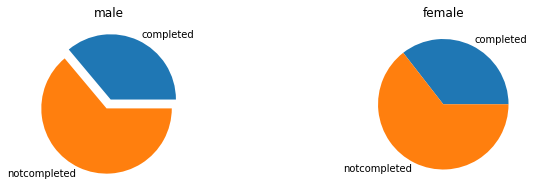

In [46]:
fig, axis = plt.subplots(1, 2, figsize = (11,3))
axis[0].set_title("male")
axis[1].set_title("female")
axis[0].pie([testprepdict['Male']['completed'], testprepdict['Male']['noncompleted']], labels = ["completed", "notcompleted"], explode = [0.08, 0.07])
axis[1].pie([testprepdict['Female']['completed'], testprepdict['Female']['noncompleted']], labels = ["completed", "notcompleted"])

In [47]:
testprepdict

{'Male': {'completed': 174, 'noncompleted': 308},
 'Female': {'completed': 184, 'noncompleted': 334}}

In [48]:
# plot bar-graph for every group of people who have completed test prep
# create a sub plot and show 4 diff types of graphs having data of group with test preperation
# create a stacked bar graph having groups on the x-axis and male and female on the y-axis
# review matplotlib visualizations and pandas

<BarContainer object of 5 artists>

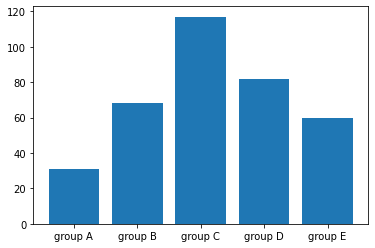

In [49]:
groupList = ['group A', 'group B', 'group C', 'group D', 'group E']
groupValues = []
for group in groupList:
    groupValues.append(data.loc[(data["race_ethnicity"] == group) & (data["test_preparation_course"] == "completed")].shape[0])
plt.bar(groupList, groupValues)

<StemContainer object of 3 artists>

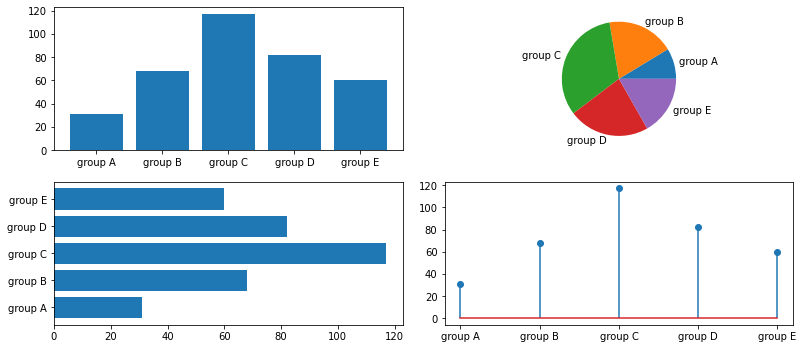

In [50]:
testFig, testAxis = plt.subplots(2, 2, figsize = (11,5))
plt.tight_layout()
testAxis[0][0].bar(groupList, groupValues)
testAxis[0][1].pie(groupValues, labels = groupList)
testAxis[1][0].barh(groupList, groupValues)
testAxis[1][1].stem(groupList, groupValues)

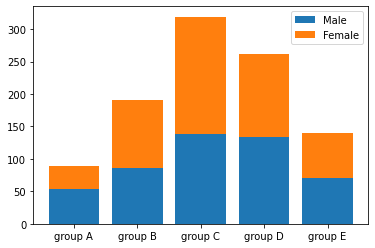

In [61]:
genderCountsM = []
genderCountsF = []
for group in groupList:
    genderCountsM.append(data.loc[(data["race_ethnicity"] == group) & (data["gender"] == "male")].shape[0])
    genderCountsF.append(data.loc[(data["race_ethnicity"] == group) & (data["gender"] == "female")].shape[0])

plt.bar(groupList, genderCountsM)
plt.bar(groupList, genderCountsF, bottom = genderCountsM)
plt.legend(["Male", "Female"])